# Group Project



Formar grupos de 2, máximo 3 pessoas.

**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata


**Objectivo:** Usar técnicas de regressão para prever a rating de um filme com base em diferentes características.


**Notas importantes**
    
    1. Usar a coluna "vote_average" como target.
    2. Usar técnicas de regressão para prever a rating (vote_average) que um filme terá com base em diferentes caracteristicas.
    
**Recomendações**
    
    1. Não é necessário, nem recomendável, usar todas as features disponíveis (especialmente as que não são númericas).
    2. O exercício pode demorar muito ou pouco tempo, dependendo da exploração que for feita. Não é esperado que sejam explorados todos os detalhes, nem todas as abordagens possíveis.
    3. Se houver falta de tempo para explorar tudo o que gostariam, ou querem fazer alguma técnica que iria levar muito tempo, expliquem por escrito qual era a ideia e o que esperariam obter.
    4. Tentem explicar o máximo possível o racícionio por detrás de todos os passos que afectuarem.
    5. Acima de tudo, divirtam-se!
    
**Perguntas**

    1. Quantos filmes existem no dataset? E quantas features?
    2. Existem variáveis que não são independentes entre si?
    3. Qual a técnica de regressão que levou a melhores resultados?
    4. Quais os factores que mais contribuem para o sucesso de um filme?
    5. Recomendariam o vosso modelo a uma produtora de filmes?
    

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np

In [92]:
use_google_colab = False
seed = 42

In [93]:
if use_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    datapath = '/content/drive/My Drive/Fundamentos_ML_Dados/tmdb_5000_movies.csv'
else:
    datapath = 'tmdb_5000_movies.csv'

In [94]:
df = pd.read_csv(datapath)

In [95]:
print(f'movies no.{df.shape[0]}')
print(f'feature no.{df.shape[1]}')

movies no.4803
feature no.20


In [96]:
len(df["id"].unique())

4803

Nº  Features são apenas 18, porque o id é apenas um  identificador, e a coluna targetnão é considerado uma feature.

In [97]:
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4718,120000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.adogsbreakfastmovie.com/,18632,"[{""id"": 10183, ""name"": ""independent film""}]",en,A Dog's Breakfast,If you've never been good at anything in your ...,2.213889,"[{""name"": ""Kibble Productions"", ""id"": 61307}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",2007-03-03,0,88.0,[],Released,Man's best friend makes the worst accomplice.,A Dog's Breakfast,5.9,24
792,58000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,9007,"[{""id"": 732, ""name"": ""coma""}, {""id"": 818, ""nam...",en,Just Like Heaven,Shortly after David Abbott moves into his new ...,13.435730,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-09-16,102854431,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It's a wonderful afterlife.,Just Like Heaven,6.5,579
3639,5000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,1415,"[{""id"": 242, ""name"": ""new york""}, {""id"": 612, ...",en,Party Monster,The New York club scene of the 80s and 90s was...,4.129165,"[{""name"": ""ContentFilm"", ""id"": 1420}]","[{""iso_3166_1"": ""NL"", ""name"": ""Netherlands""}, ...",2003-09-05,742898,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,'Til death do they party...,Party Monster,5.9,58
111,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ...",http://www.transformersmovie.com/,1858,"[{""id"": 2535, ""name"": ""destroy""}, {""id"": 4375,...",en,Transformers,"Young teenager, Sam Witwicky becomes involved ...",25.468493,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-06-27,709709780,144.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Their war. Our world.,Transformers,6.6,4040
4456,800000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.lhp.com.sg/victor/,25461,"[{""id"": 10183, ""name"": ""independent film""}]",en,Raising Victor Vargas,"The film follows Victor, a Lower East Side tee...",3.643662,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-05-16,2816116,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Raising Victor Vargas,7.8,13


In [98]:
# prompt: print collumns name df

df.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

<Axes: >

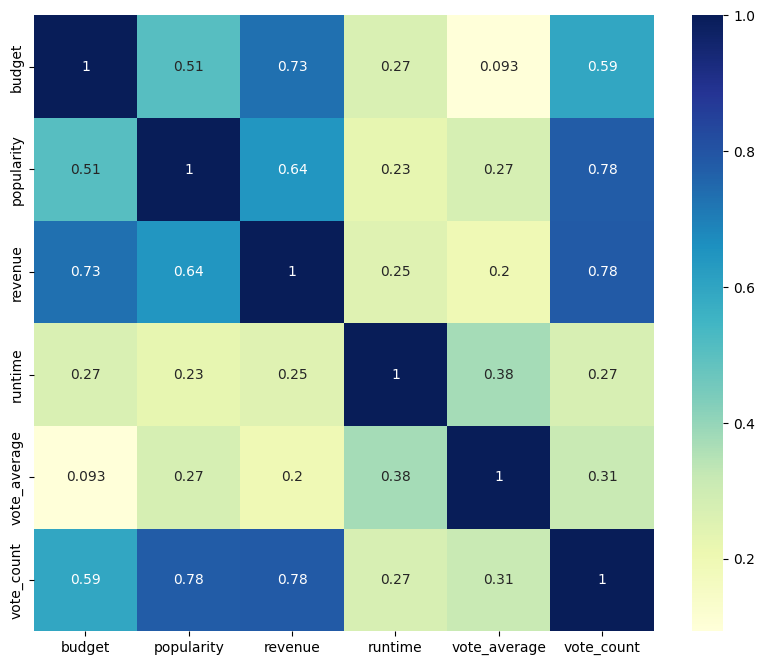

In [99]:
numeric_df = df.select_dtypes(include=['number'])
var_to_remove = ["id"]

numeric_var_df = numeric_df.drop(var_to_remove, axis=1)
spearman_corr = numeric_var_df.corr(method='spearman')
fig = plt.figure(figsize = (10, 8))
sns.heatmap(numeric_var_df.corr(), annot=True, cmap = "YlGnBu")

<Axes: >

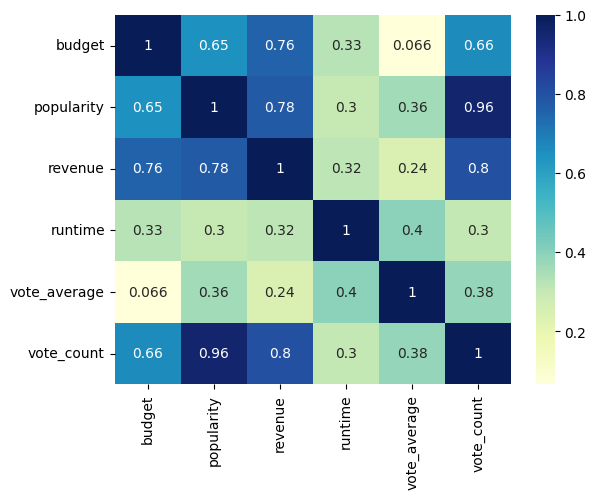

In [100]:
sns.heatmap(spearman_corr, annot=True, cmap = "YlGnBu")

Sim existem variaveis que não são independentes entre si, (popularity and vote_count), (revenue and vote count), (budget and revenue) and  (revenue and popularity)

In [101]:
# prompt: drop nulls variable runtime

numeric_var_df.dropna(inplace=True)


In [102]:
# prompt: list  correlation variables on dataframe numeric_var_df, exclude itself correaltion, minimum correlation 0.5, e
numeric_var_df.isnull().sum()
numeric_var_df.dropna(inplace=True)
# Calculate the correlation matrix
correlation_matrix = numeric_var_df.corr()

# Exclude self-correlation
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)

# Find variables with correlation above 0.5
correlated_vars = correlation_matrix[abs(correlation_matrix) >= 0.5]

# Print the correlated variables
correlated_vars


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,NaN,0.505346,0.730798,NaN,NaN,0.593135
popularity,0.505346,NaN,0.644677,NaN,NaN,0.778098
revenue,0.730798,0.644677,NaN,NaN,NaN,0.781462
runtime,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,NaN,NaN,NaN,NaN,NaN,NaN
vote_count,0.593135,0.778098,0.781462,NaN,NaN,NaN


In [103]:
print(df.columns.tolist())


['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


---

In [104]:
def adjusted_r2(r2, X):


    return (1 - ((1 - r2)*(X.shape[0] - 1)/(X.shape[0] - X.shape[1] - 1)))

# 3

pre processae«mento
---

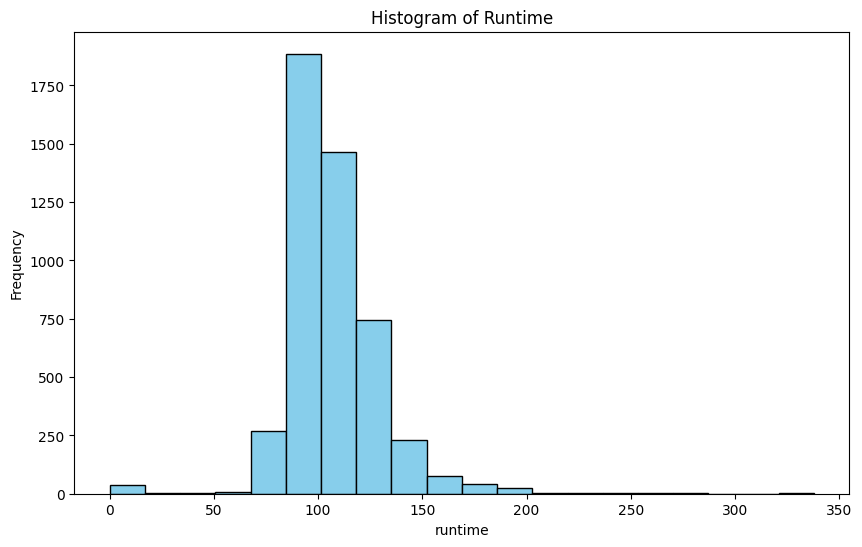

In [105]:
# prompt: create histogram variable RunTime

import matplotlib.pyplot as plt
# Assuming 'RunTime' is a column in your DataFrame 'df'
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime')
plt.show()


In [106]:
# prompt: variable runtime describe

# Assuming 'runtime' is the column you want to describe
runtime_description = df['runtime'].describe()
runtime_description


count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [107]:
# prompt: create kurtosis  and skewness variable runtime

# Calculate kurtosis and skewness
kurtosis = df['runtime'].kurtosis()
skewness = df['runtime'].skew()

print(f"Kurtosis of runtime: {kurtosis}")
print(f"Skewness of runtime: {skewness}")


Kurtosis of runtime: 8.935448828134865
Skewness of runtime: 0.7159565062897394


In [108]:
# prompt: variable runtime fill null with median

# Fill NaN values in 'runtime' with the median
numeric_df['runtime'] = numeric_df['runtime'].fillna(numeric_df['runtime'].median())


In [151]:
numeric_df

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,220000,9367,14.269792,2040920,81.0,6.6,238
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6
4801,0,126186,0.857008,0,98.0,5.7,7


In [158]:
train_set, test_set = train_test_split(numeric_df, test_size=0.2, random_state=seed)

train_set = train_set.sample(frac=1, random_state=seed)

X_train = train_set.drop(columns=var_to_remove+['vote_average'])
y_train = train_set['vote_average']
X_test = test_set.drop(columns=var_to_remove+['vote_average'])
y_test = test_set['vote_average']

In [159]:
X_train.sample(1)

,budget,popularity,revenue,runtime,vote_count
3523,0,0.114342,126,139.0,11


In [160]:
# prompt: list null x_train

X_train.isnull().sum()


budget        0
popularity    0
revenue       0
runtime       0
vote_count    0
dtype: int64

# Definir o pipeline
regression_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('poly_features', PolynomialFeatures()),  # Gera termos polinomiais
    ('regressor', LinearRegression())  # Modelo de regressão linear
])

# Definir os hiperparâmetros para otimização
param_grid = {
    "poly_features__degree": [1, 2, 3, 4],  # Grau do polinómio
    "regressor__fit_intercept": [True, False]  # Incluir termo de intercepto

}

# Aplicar GridSearchCV
grid_search = GridSearchCV(regression_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

In [161]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Importações dos regressores
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

seed = 42

models_and_params = [
    # Exemplo: Rede Neural (ANN)
    (
        'ann',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', MLPRegressor(random_state=seed))
        ]),
        {
            "Regressor__hidden_layer_sizes": [(20,), (40,), (20, 40), (40, 20), (20, 40, 60), (60, 40, 20)],
            "Regressor__max_iter": [100, 1000]
        }
    ),
    # Exemplo: Random Forest para regressão
    (
        'random_forest',
        RandomForestRegressor(random_state=seed),
        {
            'n_estimators': [10, 100, 300],
            'max_depth': [2, 4, 6]
        }
    ),
    # Exemplo: Decision Tree para regressão
    (
        'decision_tree',
        DecisionTreeRegressor(random_state=seed),
        {
            'max_depth': [2, 4, 6, 8],
            'min_samples_split': [2, 4, 6, 10],
            'min_samples_leaf': [1, 4, 10],
            'criterion': ["squared_error", "absolute_error"],
            'splitter': ["best", "random"]
        }
    ),
    # Exemplo: SVM para regressão (SVR)
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', SVR())
        ]),
        {
            "Regressor__C": [0.1, 1, 10],
            "Regressor__gamma": np.logspace(-9, 3, 10),
            "Regressor__kernel": ["linear", "rbf"]
        }
    ),
    # Exemplo: KNN para regressão
    (
        'knn',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Regressor', KNeighborsRegressor())
        ]),
        {
            "Regressor__n_neighbors": [1, 10, 100]
        }
    ),
    # Exemplo: Regressão Polinomial
   (
    'polynomial_regression',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('regressor', LinearRegression())
    ]),
    {
        'poly__degree': [2, 3, 4],
        'regressor__fit_intercept': [True, False]
    }
),
    # Exemplo: Regressão Múltipla (LinearRegression)
    (
        'multiple_linear_regression',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('regressor', LinearRegression())
        ]),
        {
            'regressor__fit_intercept': [True, False]
            # Você pode incluir mais parâmetros se necessário
        }
    )
]


In [162]:
grid_search_results = []

for model_str, clf, params in models_and_params:
  print(f"Currently assessing {model_str}")
  grid_searech_result = GridSearchCV(clf, params, cv = 5).fit(X_train, y_train)
  grid_search_results.append(grid_searech_result)

Currently assessing ann


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

Currently assessing random_forest
Currently assessing decision_tree
Currently assessing svm
Currently assessing knn
Currently assessing polynomial_regression
Currently assessing multiple_linear_regression


In [163]:
from sklearn.model_selection import GridSearchCV

def get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula resíduos (y_test - y_pred).
      5) Retorna um dicionário com os resíduos de cada modelo.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - residuals_dict: dicionário {nome_modelo: vetor_de_residuos}
    """
    residuals_dict = {}
    y_pred_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Cálculo dos resíduos (valor real - predito)
        residuals = y_test - y_pred

        # Armazena no dicionário
        residuals_dict[model_name] = residuals
        y_pred_dict[model_name] = y_pred

    return residuals_dict, y_pred_dict


In [164]:
residuals_dict, y_pred_dict= get_residuals_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5)

c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [117]:
residuals_dict.keys()

dict_keys(['ann', 'random_forest', 'decision_tree', 'svm', 'knn', 'polynomial_regression', 'multiple_linear_regression'])

In [118]:
y_pred_dict.keys()

dict_keys(['ann', 'random_forest', 'decision_tree', 'svm', 'knn', 'polynomial_regression', 'multiple_linear_regression'])

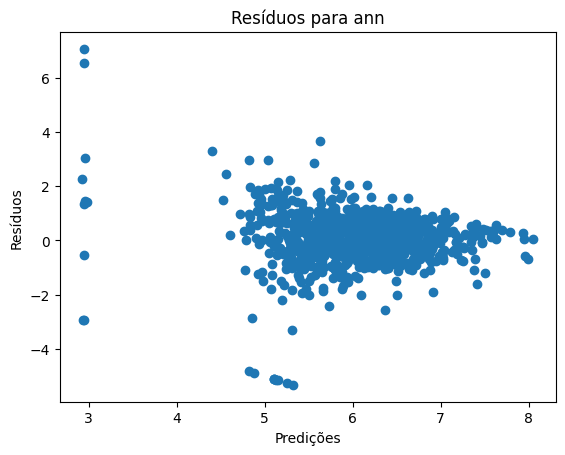

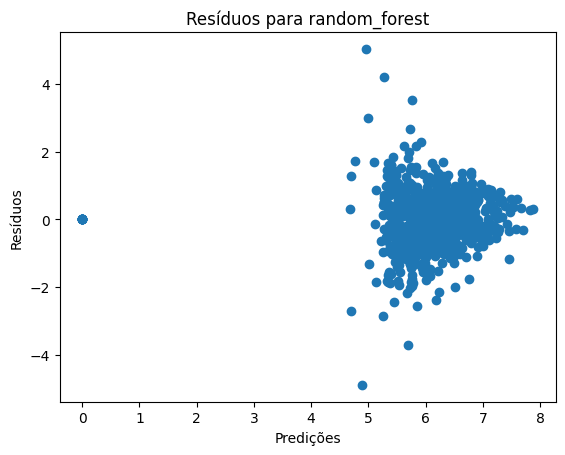

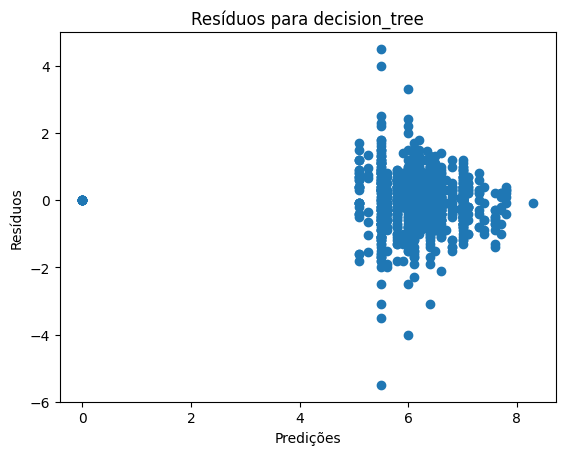

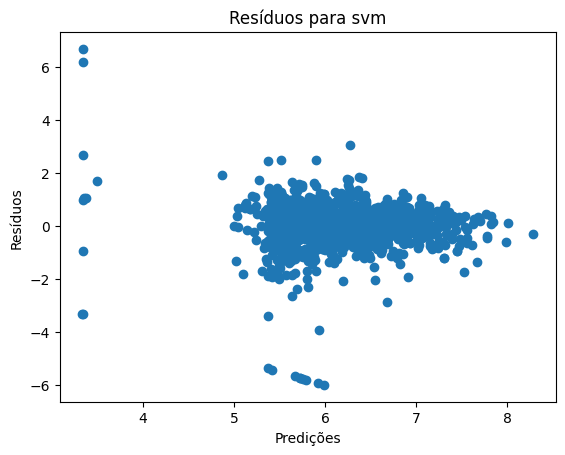

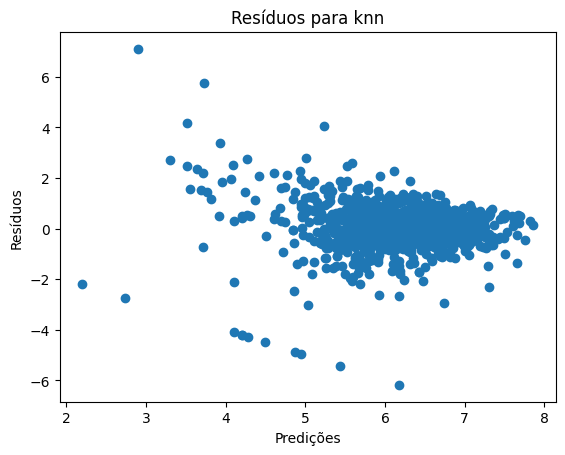

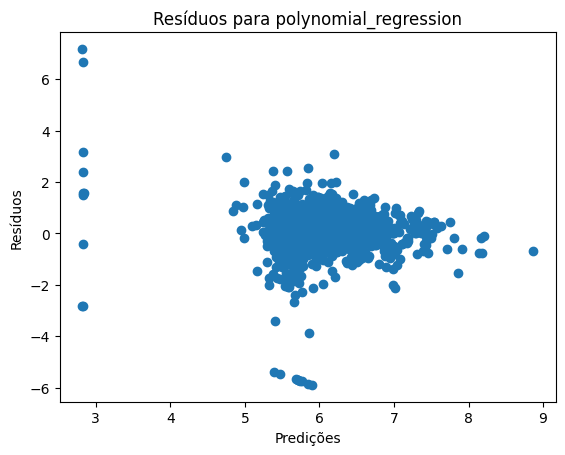

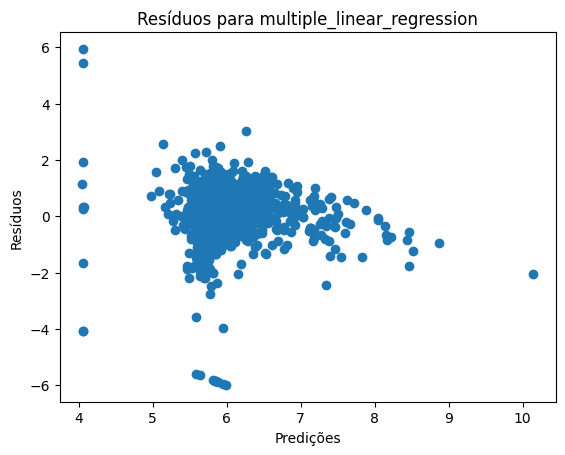

In [165]:
for model_name in residuals_dict:
    current_residuals = residuals_dict[model_name]  # array/Series
    current_y_pred    = y_pred_dict[model_name]      # array/Series

    plt.scatter(current_y_pred, current_residuals)
    plt.xlabel("Predições")
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos para {model_name}")
    plt.show()

In [166]:
grid_search_results

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                        ('Regressor',
                                         MLPRegressor(random_state=42))]),
              param_grid={'Regressor__hidden_layer_sizes': [(20,), (40,),
                                                            (20, 40), (40, 20),
                                                            (20, 40, 60),
                                                            (60, 40, 20)],
                          'Regressor__max_iter': [100, 1000]}),
 GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
              param_grid={'max_depth': [2, 4, 6],
                          'n_estimators': [10, 100, 300]}),
 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'criterion': ['squared_error', 'absolute_error'],
                          'max_depth': [2, 4, 6, 8],
                          'min_sample

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def get_r2_all_models(models_and_params, X_train, y_train, X_test, y_test, scoring='r2', cv=5):
    """
    Para cada modelo em models_and_params:
      1) Executa um GridSearchCV usando 'scoring' e 'cv' definidos.
      2) Treina no (X_train, y_train).
      3) Faz predições em X_test.
      4) Calcula R² (comparando y_test e y_pred).
      5) Retorna um dicionário com R² de cada modelo no conjunto de teste.

    Parâmetros:
    - models_and_params: lista de tuplas (nome_modelo, pipeline, param_grid).
    - X_train, y_train: dados de treino.
    - X_test, y_test: dados de teste.
    - scoring: métrica a ser otimizada no GridSearch (default: 'r2').
    - cv: número de folds (default: 5).

    Retorna:
    - r2_dict: {nome_modelo: r2_score_no_teste}
    """

    r2_dict = {}

    for model_name, pipeline, param_grid in models_and_params:
        # Cria o GridSearchCV para o pipeline com os parâmetros
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Ajusta no conjunto de treino (usando cross-validation)
        gs.fit(X_train, y_train)

        # Extrai o melhor modelo encontrado
        best_model = gs.best_estimator_

        # Predição no conjunto de teste
        y_pred = best_model.predict(X_test)

        # Calcula R²
        r2 = r2_score(y_test, y_pred)

        # Armazena no dicionário
        r2_dict[model_name] = r2

    return r2_dict


In [168]:
r2_results = get_r2_all_models(
    models_and_params, 
    X_train, y_train, 
    X_test, y_test, 
    scoring='r2', 
    cv=5
)

# Exibir os resultados
for model_name, r2_val in r2_results.items():
    print(f"Modelo: {model_name} | R² (teste): {r2_val:.4f}")


c:\Users\PereiraRodrigues\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Modelo: ann | R² (teste): 0.2850
Modelo: random_forest | R² (teste): 0.5303
Modelo: decision_tree | R² (teste): 0.4982
Modelo: svm | R² (teste): 0.2908
Modelo: knn | R² (teste): 0.2788
Modelo: polynomial_regression | R² (teste): 0.2350
Modelo: multiple_linear_regression | R² (teste): 0.2076


Adicionar na função  get_r2_all_models o calculo de r2 ajustado

---

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

X_train_mlr = train_set[['budget','vote_count']]
y_train = train_set['vote_average']

X_test_mlr =test_set[['budget', 'vote_count']]
y_test = test_set['vote_average']

In [124]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

X_train_mlr = train_set[['vote_count']]
y_train = train_set['vote_average']

X_test_mlr =test_set[['vote_count']]
y_test = test_set['vote_average']

In [125]:
mlr_model = LinearRegression().fit(X_train_mlr, y_train)

y_preds = mlr_model.predict(X_test_mlr)

In [126]:
r2_mlr = r2_score(y_test, y_preds)

r2_mlr

0.09883585665871741

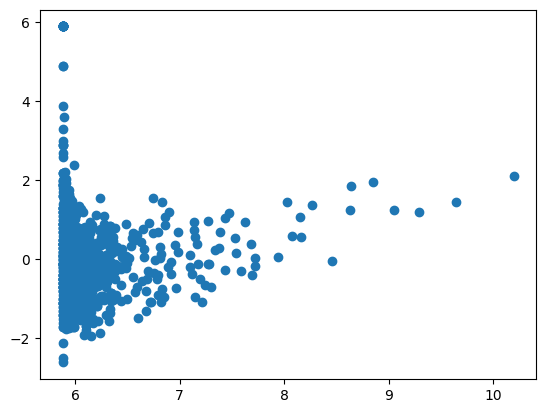

In [127]:
residuals = y_preds - y_test

plt.scatter(y_preds, residuals)

In [128]:
null_counts = df.isnull().sum()
null_counts

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
mean_runtime = df['runtime'].mean()
df['runtime'].fillna(mean_runtime, inplace=True)
print(df.isnull().sum())
print(df['runtime'].describe())


In [ ]:
df_sample = df.select_dtypes(include=['number'])

In [ ]:
print(df_sample.columns.tolist())


In [149]:
X_train.sample(5)

,budget,popularity,revenue,runtime,vote_count
3052,0,9.177896,0,97.0,131
4001,0,1.738920,0,86.0,22
1794,26000000,5.894163,38793283,94.0,89
1216,40000000,17.659032,145896422,96.0,554
394,75000000,36.743324,152930623,104.0,932


In [150]:
X_test.sample(5)

,budget,popularity,revenue,runtime,vote_count
3273,8000000,8.204829,0,111.0,196
705,70000000,26.676487,171844840,113.0,588
371,68000000,20.913852,118063304,116.0,302
1162,40000000,26.253357,177259441,129.0,959
1024,47000000,7.859226,103738726,103.0,251


In [130]:
train_set, test_set = train_test_split(numeric_df, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 'columns')
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

mlr_model = LinearRegression().fit(X_train, y_train)

y_preds = mlr_model.predict(X_test)

r2_mlr = r2_score(y_test, y_preds)

r2_mlr

0.3022589042239624

In [134]:
# Cálculo do R² ajustado
n = X_test.shape[0]        # Número de observações no teste
p = X_test.shape[1]        # Número de atributos (features)
r2_mlr_adj = 1 - (1 - r2_mlr) * (n - 1) / (n - p - 1)

print(f"R² no teste: {r2_mlr:.4f}")
print(f"R² ajustado no teste: {r2_mlr_adj:.4f}")

R² no teste: 0.3023
R² ajustado no teste: 0.2979


In [135]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# 4) Criar transformações polinomiais de grau 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# 5) Ajustar o modelo Linear nos dados polinomiais de treino
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6) Prever no conjunto de teste
y_pred = model.predict(X_test_poly)

# 7) Calcular R²
r2_poly3 = r2_score(y_test, y_pred)

# 8) Calcular R² Ajustado
#    n: número de observações no teste
#    p: número de colunas (features) após a transformação polinomial
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]

r2_poly3_adj = 1 - (1 - r2_poly3) * (n - 1) / (n - p - 1)

print(f"R² (Polinomial Grau 3): {r2_poly3:.4f}")
print(f"R² Ajustado (Polinomial Grau 3): {r2_poly3_adj:.4f}")


R² (Polinomial Grau 3): -0.2115
R² Ajustado (Polinomial Grau 3): -0.3261


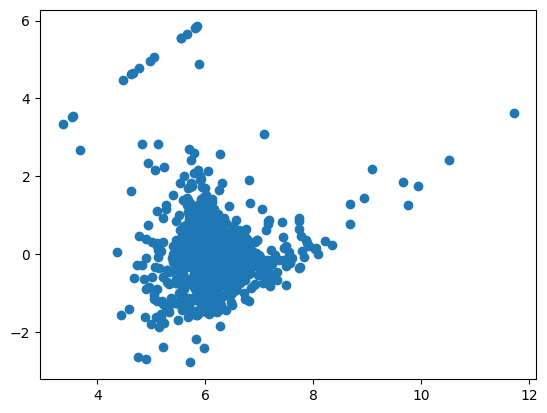

In [131]:
residuals = y_preds - y_test

plt.scatter(y_preds, residuals)

In [132]:
poly = PolynomialFeatures(degree = 2)

In [133]:
X_train_transformed = poly.fit_transform(X_train)

X_test_transformed = poly.fit_transform(X_test)

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = poly.get_feature_names_out(X_train.columns))

X_test_transformed = pd.DataFrame(X_test_transformed, columns = poly.get_feature_names_out(X_test.columns))

In [ ]:
X_train_transformed.head()

In [ ]:
X_train_transformed.shape

In [ ]:
slr_poly_model = LinearRegression().fit(X_train_transformed, y_train)

y_preds = slr_poly_model.predict(X_test_transformed)

r2 = r2_score(y_test, y_preds)

r2